In [20]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

path=os.path.expanduser('~\\Desktop\\Xiao\\Xiao\\plots\\gas invasion')  
os.chdir(path) # set the working directory

load matfile

In [21]:
import scipy.io

# load oil baseline
temp = scipy.io.loadmat('LX_oilBL_072119_01.mat')
CT_oilbase=temp['LX_oilBL_072119_01'].astype(float)
CT_oilbase[CT_oilbase<=0]=np.float('nan')

# load gas baseline
temp = scipy.io.loadmat('LX_airBL_072019_01.mat')
CT_airbase=temp['LX_airBL_072019_01'].astype(float)


calculate porosity

In [22]:
A_oil=-325
A_air=-1000

porosity = (CT_airbase - CT_oilbase)/(A_air - A_oil)

print(np.nanmean(porosity[:,:,34]))

0.28241498103242585


calculate gas saturation

In [23]:

A_gas = -953

temp = scipy.io.loadmat('LX_gasInv_072119_01.mat')
CT_1=temp['LX_gasInv_072119_01'].astype(float)

temp = scipy.io.loadmat('LX_gasInv_072119_02.mat')
CT_2=temp['LX_gasInv_072119_02'].astype(float)

temp = scipy.io.loadmat('LX_gasInv_072119_03.mat')
CT_3=temp['LX_gasInv_072119_03'].astype(float)

temp = scipy.io.loadmat('LX_gasInv_072119_04.mat')
CT_4=temp['LX_gasInv_072119_04'].astype(float)

temp = scipy.io.loadmat('LX_gasInv_072119_05.mat')
CT_5=temp['LX_gasInv_072119_05'].astype(float)

temp = scipy.io.loadmat('LX_gasInv_072119_06.mat')
CT_6=temp['LX_gasInv_072119_06'].astype(float)



Sw1 = (CT_1-CT_oilbase)/(porosity*(A_gas-A_oil))
Sw2 = (CT_2-CT_oilbase)/(porosity*(A_gas-A_oil))
Sw3 = (CT_3-CT_oilbase)/(porosity*(A_gas-A_oil))
Sw4 = (CT_4-CT_oilbase)/(porosity*(A_gas-A_oil))
Sw5 = (CT_5-CT_oilbase)/(porosity*(A_gas-A_oil))
Sw6 = (CT_6-CT_oilbase)/(porosity*(A_gas-A_oil))


title1 = '$S_o$ during invasion @ 1.75 min'
title2 = '$S_o$ during invasion @ 7.58 min'
title3 = '$S_o$ during invasion @ 14.75 min'
title4 = '$S_o$ during invasion @ 20.75 min'
title5 = '$S_o$ during invasion @ 27.23 min'
title6 = '$S_o$ during invasion @ 32.33 min'


title=['1.75 min','7.58 min','14.75 min','20.75 min','27.23 min','32.33 min']

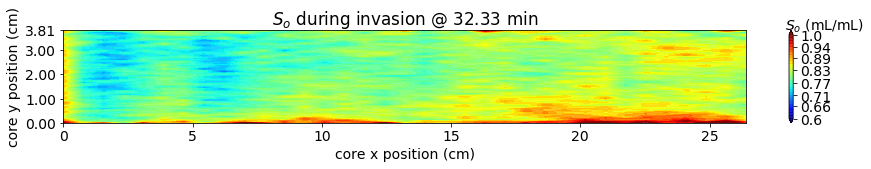

In [24]:
Z=1-np.flip(Sw6,2) # pass saturation to a generic variable Z

core_width = 1.7
aspect_ratio = 9
zmin = 0.60; zmax = 1

p_slice = np.nanmean(Z, axis=1) #axis=0 row-wise average, axis=1 column-wise average 
[n1,n2]=p_slice.shape
x = np.arange(n1)*3.81/n1
y = np.arange(n2)*27.2/n2
X, Y = np.meshgrid(y, x)

#zmin = np.min(p_slice)*100; zmax = np.max(p_slice)*100

#zmin=10;zmax=25;nl=4;
c_ticks = np.linspace(zmin, zmax, 8) # pre-specify colorbar ticks
c_ticks = np.round(c_ticks,2)

#fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,2))   
fig, ax1 = plt.subplots(1,1,figsize=(core_width*aspect_ratio,core_width ))  
cf1 = ax1.contourf(X, Y, p_slice, np.linspace(zmin, zmax, 30), cmap='jet',alpha=0.9,corner_mask=True,extend='both') # contour plot with 5 levels
cb1 = fig.colorbar(cf1, ax=ax1)
cb1.set_ticks(c_ticks)
cb1.set_ticklabels(c_ticks)
cb1.set_label('$S_o$ (mL/mL)', labelpad=-7, y=1.15, rotation=0)
ax1.set_yticks([0,1,2,3,3.81])
ax1.set_xlabel('core x position (cm)');ax1.set_ylabel('core y position (cm)');ax1.set_title(title6); # specify labels and titles#plt.colorbar()

# save figures
plt.draw()
plt.show()
#fig.savefig('fig6.png', dpi=150, bbox_inches='tight')

In [35]:
Soavg=np.zeros((35,6)) # oil saturation

Z1=1-np.flip(Sw1,2) # pass saturation to a generic variable Z
Z2=1-np.flip(Sw2,2) # pass saturation to a generic variable Z
Z3=1-np.flip(Sw3,2) # pass saturation to a generic variable Z
Z4=1-np.flip(Sw4,2) # pass saturation to a generic variable Z
Z5=1-np.flip(Sw5,2) # pass saturation to a generic variable Z
Z6=1-np.flip(Sw6,2) # pass saturation to a generic variable Z

Soavg[:,0]=np.nanmean(np.nanmean(Z1, axis=1), axis=0)
Soavg[:,1]=np.nanmean(np.nanmean(Z2, axis=1), axis=0)
Soavg[:,2]=np.nanmean(np.nanmean(Z3, axis=1), axis=0)
Soavg[:,3]=np.nanmean(np.nanmean(Z4, axis=1), axis=0)
Soavg[:,4]=np.nanmean(np.nanmean(Z5, axis=1), axis=0)
Soavg[:,5]=np.nanmean(np.nanmean(Z6, axis=1), axis=0)


pdf=pd.DataFrame(data=Soavg,columns=title)
pdf.to_excel('So_gasinv.xlsx')  # doctest: +SKIP

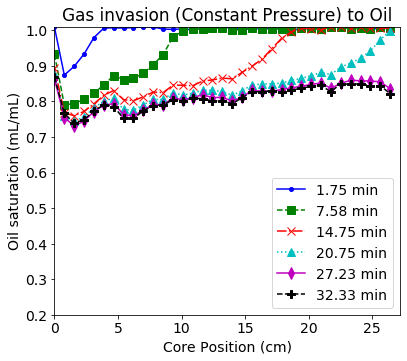

In [17]:
feature=title

lxc=['b','g','r','c','m','k']
lxls=['-','--','-.',':']
lxmarker=['.','s','x','^','d','P']


fig=plt.figure()
ax=fig.add_subplot(111)

n=6

for n in range(0,n):
    n_color=np.remainder(n,len(lxc)).astype(int)
    n_ls=np.remainder(n,len(lxls)).astype(int)
    n_marker=np.remainder(n,len(lxmarker)).astype(int)
    ax.plot(y,Soavg[:,n],c=lxc[n_color],ls=lxls[n_ls],marker=lxmarker[n_marker],label=feature[n],markersize=8)
    
ax.set_ylim(0.2,1.01)
ax.set_xlim(0,27.2)

ax.set_xlabel('Core Position (cm)')
ax.set_ylabel('Oil saturation (mL/mL)')
plt.legend(loc='lower right')
plt.title('Gas invasion (Constant Pressure) to Oil')
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=1, wspace=0.2, hspace=0.2)


plt.draw()
plt.show()
#fig.savefig('totalGI.png', dpi=150, bbox_inches='tight')

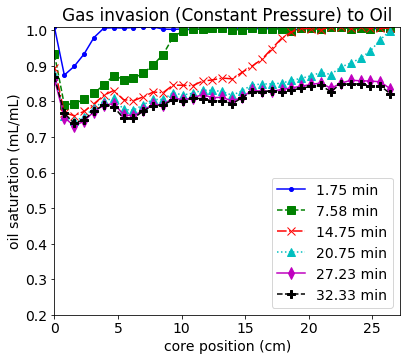

In [37]:
fprop = lambda: None
fprop.xlabel='core position (cm)'
fprop.ylabel='oil saturation (mL/mL)'
fprop.legend_loc='lower right'
fprop.title='Gas invasion (Constant Pressure) to Oil'
fprop.ylim=[0.2,1.01]
fprop.xlim=[0,27.2]
fprop.markersize=8

from CTprocessinglib import make_profile_plot

make_profile_plot(y,pdf,fprop)